# Image Classification: Environments
In this final assignment for my Machine Learning Portfolio, we will be taking a dataset (the Intel image classification datset from Kaggle, found [here:](https://www.kaggle.com/datasets/puneet6060/intel-image-classification) https://www.kaggle.com/datasets/puneet6060/intel-image-classification) and try to train a model that will classify it as one of six environment classes. (Those being building, forest, glacier, mountain, sea and street.)
## 1. The Dataset
### Loading in the Data:

In [8]:
#imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                

ModuleNotFoundError: No module named 'tqdm'

In [2]:
#global constants section

class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150) #most of the images are square like anyway, so we won't be compressing them like this.

As a sidenote, this notebook was written in the Kaggle notebook editor, so that using and loading the dataset would be infinitely easier. It seems that the dataset was already separated into three separate folders. (Which makes me splitting into train/test not really useful.)

Additionally, how the file structure of the dataset works is as follows. The dataset is separated into train/test/pred, where train/test already have images in six subdirectories that are already classified into the six aforementioned classes. Thus a lot of the prediction comes from the 'prediction' segment of the dataset. 
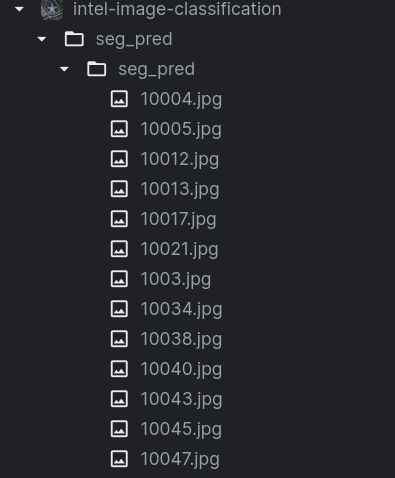
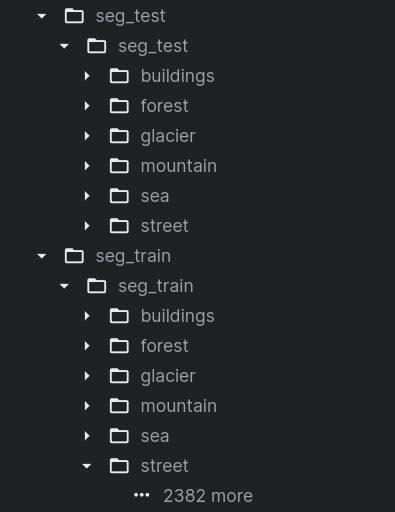

In [3]:

def load_data(): #here we just load in the data from kaggle's online notebook editor
    datasets = ['/home/jacko/Documents/Fall22/ML/ML_Portfolio/ImageClassification', '/kaggle/input/intel-image-classification/seg_test/seg_test']
    output = []
    
    #and now we iterate thru the test/train sets.
    for dataset in datasets:
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        #iterate thru folders in train/test
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            #iterate thru images in folders
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
    
    return output


In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /kaggle/input/intel-image-classification/seg_train/seg_train


100%|██████████| 2404/2404 [00:14<00:00, 162.58it/s]


Loading /kaggle/input/intel-image-classification/seg_test/seg_test


100%|██████████| 553/553 [00:02<00:00, 185.84it/s]


In [5]:
#and now we shuffle the datasets 
train_images, train_labels = shuffle(train_images, train_labels, random_state=1234)

## 1. The Dataset
### Class distribution Graph

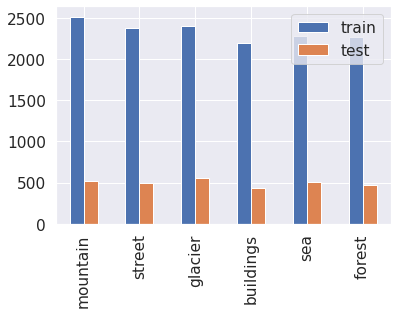

Training img total:  14034
Testing img total:  3000


In [6]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts, 'test': test_counts}, index=class_names).plot.bar()

plt.show()

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Training img total: ", n_train)
print("Testing img total: ", n_test)

## 2. Sequential Models
We'll build our first model of the assignment by doing a simple sequential model before going on to use CNN (a recommended model for image classification, which combines mulitple sequential models). 
We'll have to convert the labels of our dataset to binary class matrices.

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 6) #num_classes
test_labels = tf.keras.utils.to_categorical(test_labels, 6)

model_seq = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(6, activation='softmax'),
])

model_seq.summary()
model_seq.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

2022-12-09 03:48:02.848337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 03:48:02.849309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 03:48:03.006890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 03:48:03.007918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 03:48:03.008852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3078      
Total params: 667,654
Trainable params: 667,654
Non-trainable params: 0
__________________________________________________

0/device:GPU:0 with 13789 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
2022-12-09 03:48:05.976416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 03:48:05.977250: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13789 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
#train model
history = model_seq.fit(train_images, train_labels, batch_size= 128,
epochs= 20,
verbose=1,
validation_data=(test_images, test_labels))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2022-12-09 03:48:06.398756: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3789180000 exceeds 10% of free system memory.
2022-12-09 03:48:10.798587: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3789180000 exceeds 10% of free system memory.
2022-12-09 03:48:14.130441: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 67500)


In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model_seq.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'history' is not defined

## 3. CNN
In this part of the process, we'll move on to using a CNN model.
We do this with a tf.keras method.

An explanation:
- Conv2D: This extracts features from the image via a convolution layer. In its current state below, we have 32 filters in a size of 3x3.
- MaxPooling2D: Downsize the image by half. (/2)
- Flatten: Reshape the tensor (images) to a 1d array
- Relu: Gives max(x, 0) when given an 'x'
- Softmax: Want to match classfification classes = 6.
- Adam: Model type. Takes the exponentially weighted average of past gradients and adds to a past gradient for a better update.
- Loss function: We use categorical crossentropy as each image only belongs to a single class.

In [10]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [12]:
model_CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [7]:
historyCNN = model_CNN.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

NameError: name 'model_CNN' is not defined

In [11]:
score = model_CNN.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [1]:
# Plot training & validation accuracy values
plt.plot(historyCNN.history['val_accuracy'])
plt.plot(historyCNN.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

## 4. Transfer Learning
We will conclude the image classification with using InceptionV3 for transfer learning, which is a new discipline in deep learning where we try to use pretrained models to try and predict new datasets.

In [2]:
#import
from tensorflow.keras.applications.inception_v3 import InceptionV3

#create the pretrained model
pretrained = InceptionV3(input_shape = (150, 150, 3),
                        include_top = False,
                        weights = 'imagenet')

#layers should not be trainable
for layer in pretrained.layers:
    layer.trainable = False

2022-12-08 22:34:27.228015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 22:34:27.622382: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 22:34:27.622396: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 22:34:29.136791: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

87910968/87910968 [==============================] - 4s 0us/step


In [3]:
#flatten output layer to 1 output
x = layers.Flatten()(pretrained.output)
# add a cnnected layer w/ 512 units and relu
x = layers.Dense(512, activation = 'relu')(x)
#dropout rate 0.2
x = layers.Dropout(0.2)(x)
#final sigmoid
x = layers.Dense (1, activation = 'sigmoid')(x)

model_tr = Model(pretrained.input, x)

model_tr.compile(optimizer = adam,
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

NameError: name 'layers' is not defined

In [4]:
history_tr = model_tr.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

NameError: name 'model_tr' is not defined

In [5]:
# Plot training & validation accuracy values
plt.plot(history_tr.history['val_accuracy'])
plt.plot(history_tr.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [6]:
score_tr = model_tr.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score_tr[0])
print('Test accuracy:', score_tr[1])

NameError: name 'model_tr' is not defined

## 5. Reflections
Computer vision is one of the short and narrow discoveries in machine learning, and as such, we can get some impactful results for image classification.

Using a sequential model as a baseline, we can see that to improve performance we should try adding more layers and choosing a better optimzation function.

CNN performed much better - due to it's convolution layer that allows for some feature sampling, which works well for image reading. 

Transfer learning will supposedly give us a faster computation using pre-trained models, seeing as keras mantains the transfer learning models, it's safe to say that these are pretty state of the art and will result in the best possible results should they be used correctly.

## 6. Citations and Sources
[1]
“Intel Image Classification (CNN - Keras),” kaggle.com. https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras (accessed Dec. 09, 2022).

[2]
K. Team, “Keras documentation: Conv2D layer,” keras.io. https://keras.io/api/layers/convolution_layers/convolution2d/

[3]
K. Team, “Keras documentation: MaxPooling2D layer,” keras.io. https://keras.io/api/layers/pooling_layers/max_pooling2d/

[4]
K. Team, “Keras documentation: Flatten layer,” keras.io. https://keras.io/api/layers/reshaping_layers/flatten/

‌